<a href="https://colab.research.google.com/github/JanakiramanAajr/Instagram-Influencers/blob/main/Instagram_Influencers_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Load the dataset
# Assuming the dataset is in a CSV file named 'instagram_influencers.csv'
df = pd.read_csv('/content/Influencer.csv')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [ ]:
df['Country Or Region'].fillna('Unknown',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    200 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [ ]:
unique_units = set([followers[-1] for followers in df['Followers']])
unique_units

{'m'}

In [ ]:
for i in range(len(df['Followers'])):
  if df['Followers'][i][-1] == 'm':
    df['Followers'][i] = float(df['Followers'][i][:-1]) * (10 ** 6)
  else:
    df['Followers'][i] = float(df['Followers'][i])


<ipython-input-7-4175c5f9449f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Followers'][i] = float(df['Followers'][i][:-1]) * (10 ** 6)


In [ ]:
df['Followers']

0      485200000.0
1      370700000.0
2      363900000.0
3      348800000.0
4      339400000.0
          ...     
195     33600000.0
196     33600000.0
197     33600000.0
198     33500000.0
199     33400000.0
Name: Followers, Length: 200, dtype: object

In [ ]:
df['Followers'] = df['Followers'].astype(float)

In [ ]:
unique_units = set([AvgLikes[-1] for AvgLikes in df['Avg. Likes']])
unique_units

{'k', 'm'}

In [ ]:
for i in range(len(df['Avg. Likes'])):
  if df['Avg. Likes'][i][-1] == 'k':
    df['Avg. Likes'][i] = float(df['Avg. Likes'][i][:-1]) * (10 ** 3)
  elif df['Avg. Likes'][i][-1] == 'm':
    df['Avg. Likes'][i] = float(df['Avg. Likes'][i][:-1]) * (10 ** 6)
  else:
    df['Avg. Likes'][i] = float(df['Avg. Likes'][i])

<ipython-input-11-5be1cae1c1d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg. Likes'][i] = float(df['Avg. Likes'][i][:-1]) * (10 ** 6)
<ipython-input-11-5be1cae1c1d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg. Likes'][i] = float(df['Avg. Likes'][i][:-1]) * (10 ** 3)


In [ ]:
df['Avg. Likes']

0      8700000.0
1      8200000.0
2      6700000.0
3      6100000.0
4      1800000.0
         ...    
195     680600.0
196    2200000.0
197     227800.0
198     193300.0
199     382500.0
Name: Avg. Likes, Length: 200, dtype: object

In [ ]:
df['Avg. Likes'] = df['Avg. Likes'].astype(float)

In [ ]:
unique_units = set([post[-1] for post in df['Posts']])
unique_units

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'k'}

In [ ]:
for i in range(len(df['Posts'])):
  if df['Posts'][i][-1] == 'k':
    df['Posts'][i] = float(df['Posts'][i][:-1]) * (10 ** 3)
  else:
    df['Posts'][i] = float(df['Posts'][i])

<ipython-input-15-39da264e61e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Posts'][i] = float(df['Posts'][i][:-1]) * (10 ** 3)
<ipython-input-15-39da264e61e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Posts'][i] = float(df['Posts'][i])


In [ ]:
df['Posts'] = df['Posts'].astype(float)

In [ ]:
unique_units = set([new_post[-1]for new_post in df['New Post Avg. Likes']])
unique_units

{'0', 'k', 'm'}

In [ ]:
for i in range(len(df['New Post Avg. Likes'])):
  if df['New Post Avg. Likes'][i][-1] == 'k':
    df['New Post Avg. Likes'][i] = float(df['New Post Avg. Likes'][i][:-1]) * (10 ** 3)
  elif df['New Post Avg. Likes'][i][-1] == 'm':
    df['New Post Avg. Likes'][i] = float(df['New Post Avg. Likes'][i][:-1]) * (10 ** 6)
  else:
    df['New Post Avg. Likes'][i] = float(df['New Post Avg. Likes'][i])

<ipython-input-18-cc123ecae79a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Post Avg. Likes'][i] = float(df['New Post Avg. Likes'][i][:-1]) * (10 ** 6)
<ipython-input-18-cc123ecae79a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Post Avg. Likes'][i] = float(df['New Post Avg. Likes'][i][:-1]) * (10 ** 3)
<ipython-input-18-cc123ecae79a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New Post Avg. Likes'][i]

In [ ]:
df['New Post Avg. Likes'] = df['New Post Avg. Likes'].astype(float)

In [ ]:
unique_units = set([total_like[-1] for total_like in df['Total Likes']])
unique_units

{'b', 'm'}

In [ ]:
for i in range(len(df['Total Likes'])):
  if df['Total Likes'][i][-1] == 'm':
    df['Total Likes'][i] = float(df['Total Likes'][i][:-1]) * (10 ** 6)
  elif df['Total Likes'][i][-1] == 'b':
    df['Total Likes'][i] = float(df['Total Likes'][i][:-1]) * (10 ** 9)
  else:
    df['Total Likes'][i] = float(df['Total Likes'][i])

<ipython-input-21-4a5890ac43c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Likes'][i] = float(df['Total Likes'][i][:-1]) * (10 ** 9)
<ipython-input-21-4a5890ac43c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Likes'][i] = float(df['Total Likes'][i][:-1]) * (10 ** 6)


In [ ]:
df['Total Likes'] = df['Total Likes'].astype(float)

In [ ]:
import pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(df, file)

In [ ]:
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [ ]:
df = pd.DataFrame(loaded_data)

In [ ]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,Unknown
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    float64
 4   Avg. Likes           200 non-null    float64
 5   Posts                200 non-null    float64
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    float64
 8   Total Likes          200 non-null    float64
 9   Country Or Region    200 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print(correlation_matrix)

                         Rank  Influence Score  Followers  Avg. Likes  \
Rank                 1.000000        -0.354843  -0.698193   -0.277699   
Influence Score     -0.354843         1.000000   0.365428    0.048502   
Followers           -0.698193         0.365428   1.000000    0.346829   
Avg. Likes          -0.277699         0.048502   0.346829    1.000000   
Posts               -0.058132         0.168287   0.069171   -0.348795   
60-Day Eng Rate      0.028900        -0.072460  -0.107439    0.789359   
New Post Avg. Likes -0.272323         0.040011   0.260764    0.892784   
Total Likes         -0.465119         0.234987   0.667546    0.361296   

                        Posts  60-Day Eng Rate  New Post Avg. Likes  \
Rank                -0.058132         0.028900            -0.272323   
Influence Score      0.168287        -0.072460             0.040011   
Followers            0.069171        -0.107439             0.260764   
Avg. Likes          -0.348795         0.789359            

<ipython-input-55-551212ea1341>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


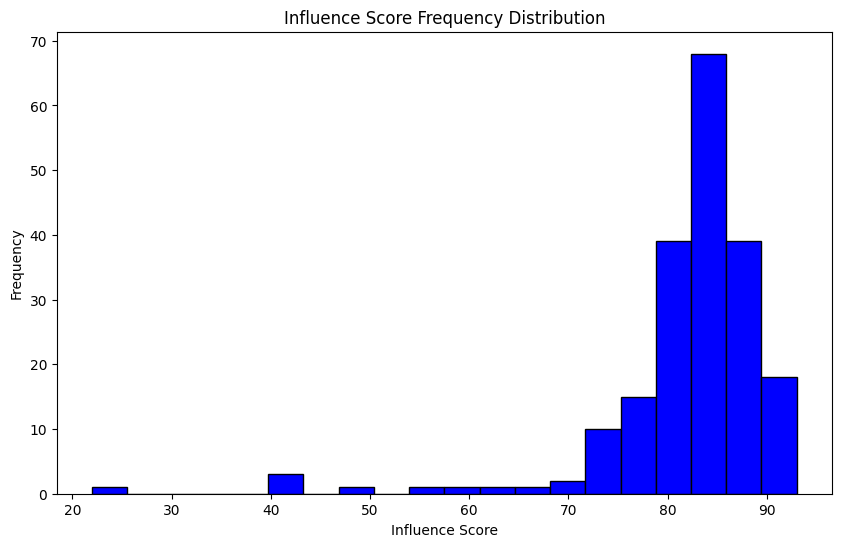

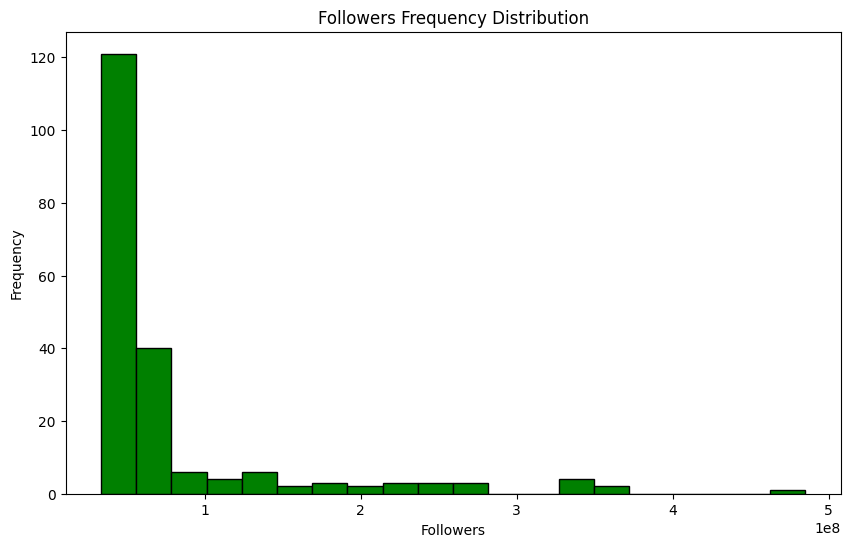

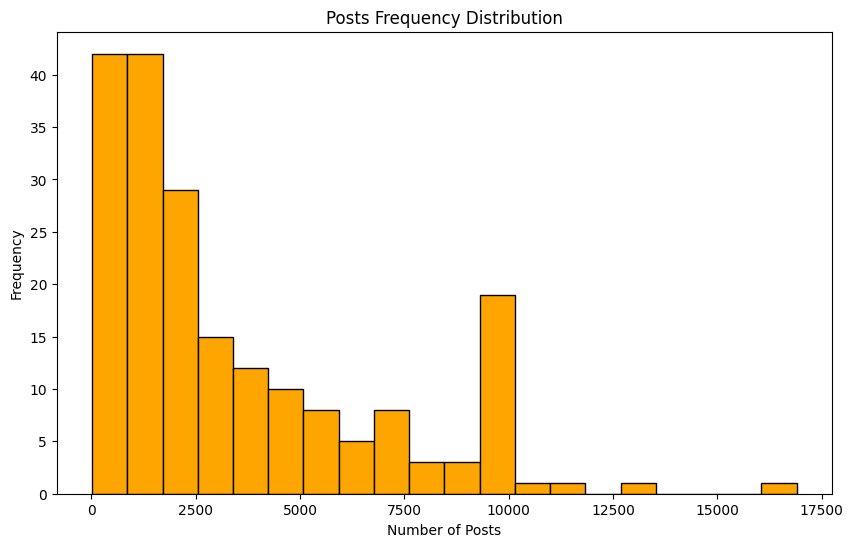

In [ ]:
# Frequency distribution for Influence Score
plt.figure(figsize=(10, 6))
plt.hist(df['Influence Score'], bins=20, color='blue', edgecolor='black')
plt.title('Influence Score Frequency Distribution')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.show()

# Frequency distribution for Followers
plt.figure(figsize=(10, 6))
plt.hist(df['Followers'], bins=20, color='green', edgecolor='black')
plt.title('Followers Frequency Distribution')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

# Frequency distribution for Posts
plt.figure(figsize=(10, 6))
plt.hist(df['Posts'], bins=20, color='orange', edgecolor='black')
plt.title('Posts Frequency Distribution')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency')
plt.show()


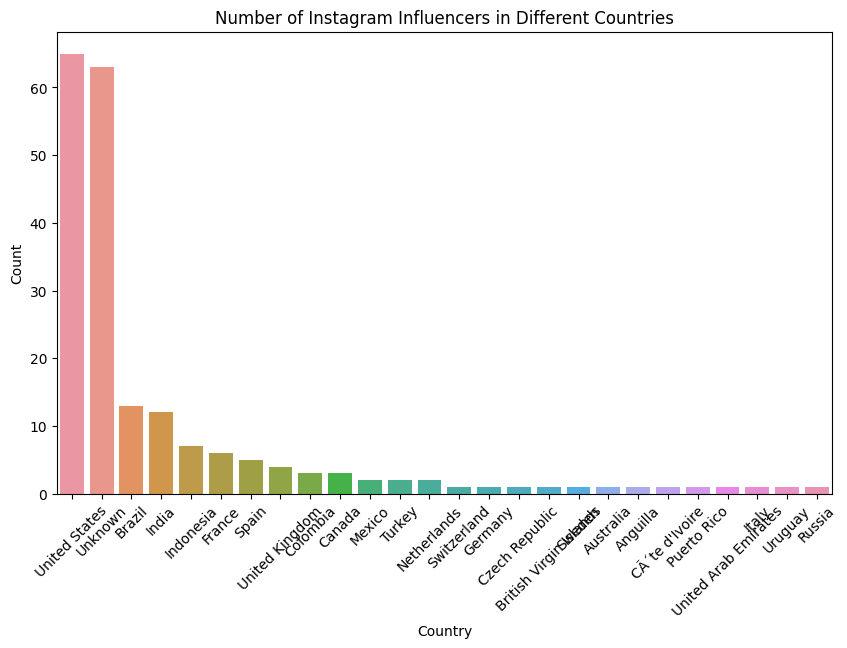

In [ ]:
country_counts = df['Country Or Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Instagram Influencers in Different Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

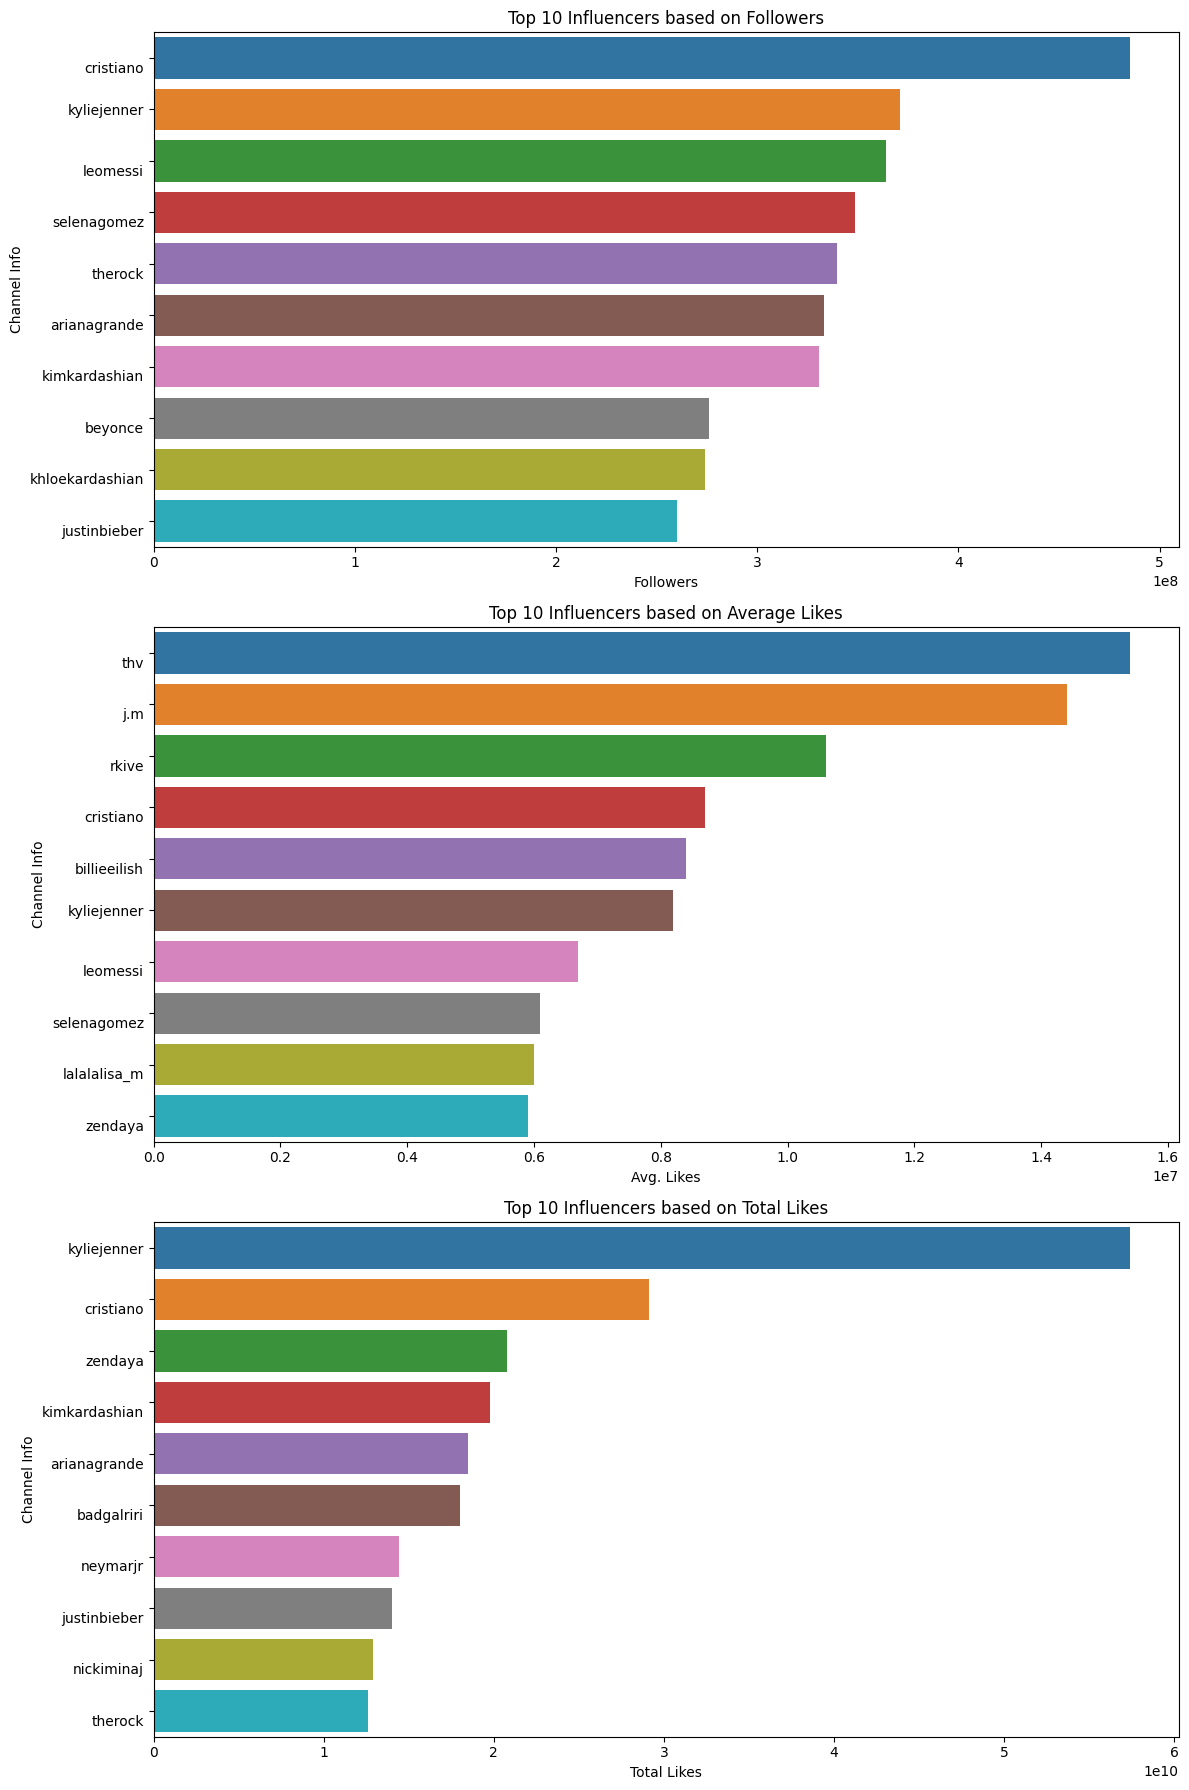

In [ ]:
top_followers = df.nlargest(10, 'Followers')
top_avg_likes = df.nlargest(10, 'Avg. Likes')
top_total_likes = df.nlargest(10, 'Total Likes')

# Plotting the results using bar charts
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Bar chart for top influencers based on Followers
sns.barplot(x='Followers', y='Channel Info', data=top_followers, ax=axes[0])
axes[0].set_title('Top 10 Influencers based on Followers')

# Bar chart for top influencers based on Average Likes
sns.barplot(x='Avg. Likes', y='Channel Info', data=top_avg_likes, ax=axes[1])
axes[1].set_title('Top 10 Influencers based on Average Likes')

# Bar chart for top influencers based on Total Likes
sns.barplot(x='Total Likes', y='Channel Info', data=top_total_likes, ax=axes[2])
axes[2].set_title('Top 10 Influencers based on Total Likes')

plt.tight_layout()
plt.show()

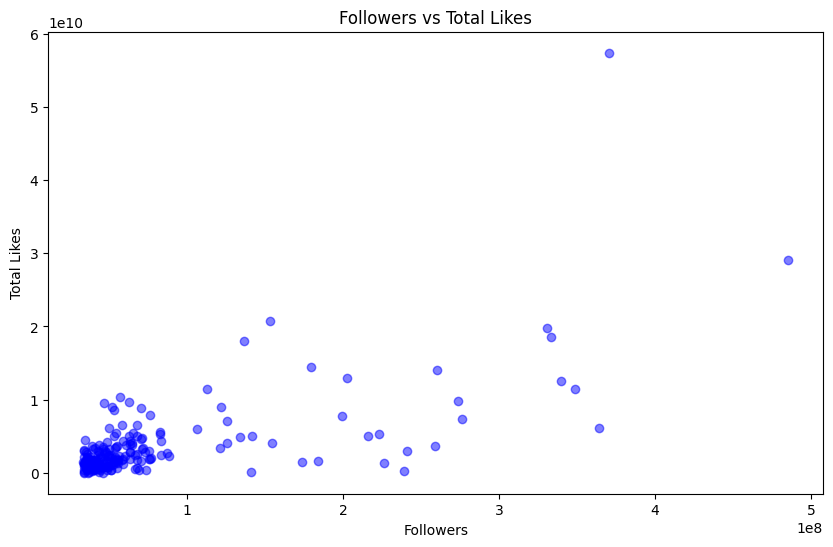

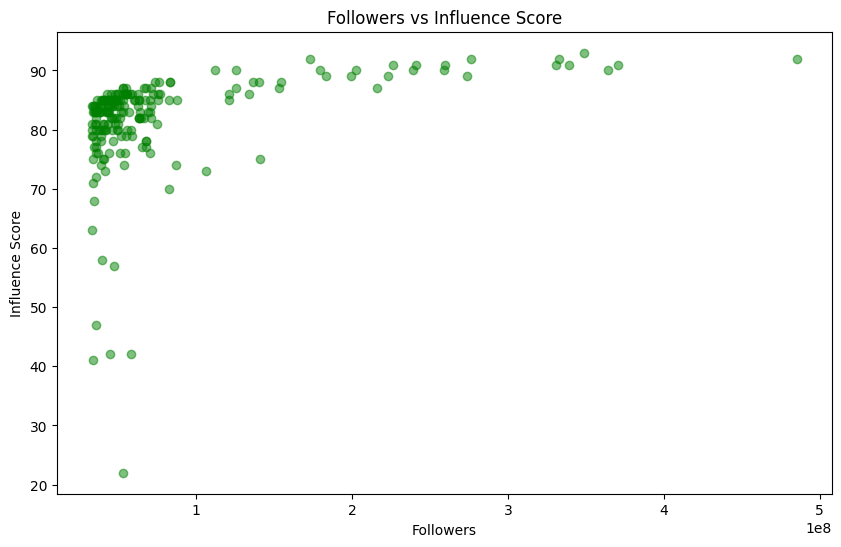

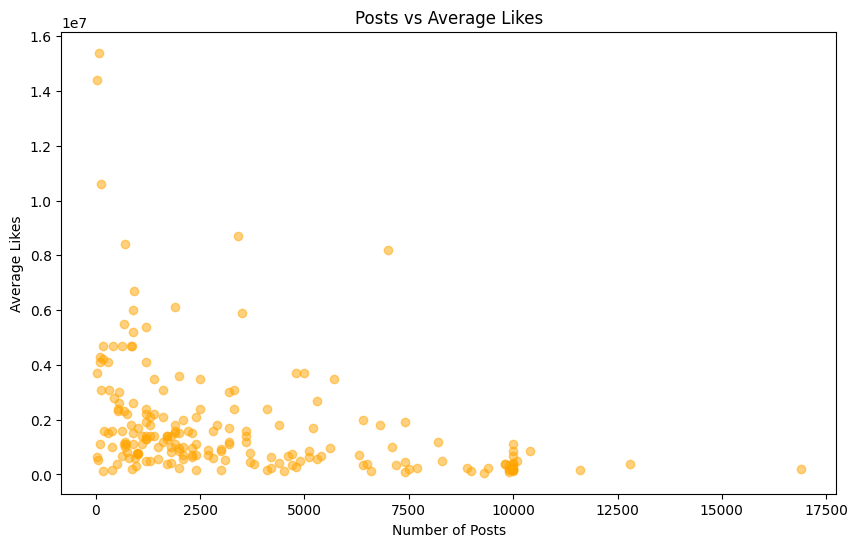

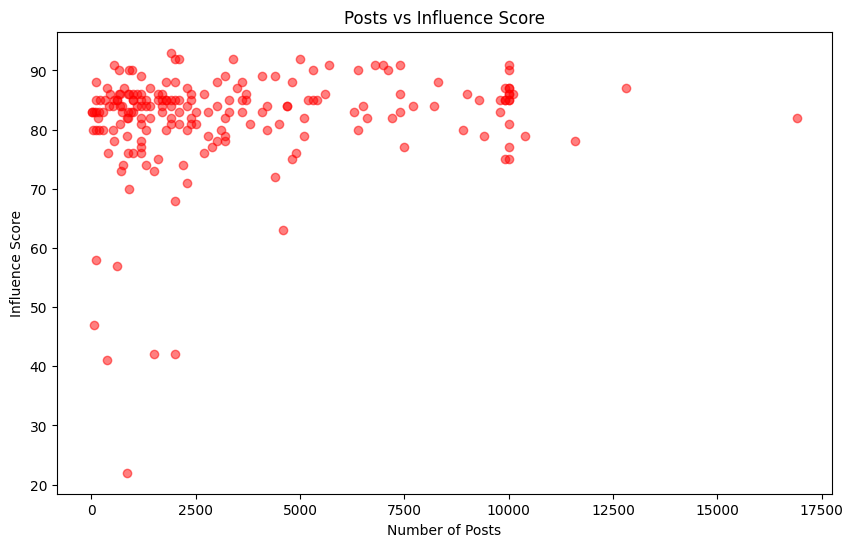

In [ ]:
# Scatter plot for Followers and Total Likes
plt.figure(figsize=(10, 6))
plt.scatter(df['Followers'], df['Total Likes'], color='blue', alpha=0.5)
plt.title('Followers vs Total Likes')
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.show()

# Scatter plot for Followers and Influence Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Followers'], df['Influence Score'], color='green', alpha=0.5)
plt.title('Followers vs Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.show()

# Scatter plot for Posts and Average Likes
plt.figure(figsize=(10, 6))
plt.scatter(df['Posts'], df['Avg. Likes'], color='orange', alpha=0.5)
plt.title('Posts vs Average Likes')
plt.xlabel('Number of Posts')
plt.ylabel('Average Likes')
plt.show()

# Scatter plot for Posts and Influence Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Posts'], df['Influence Score'], color='red', alpha=0.5)
plt.title('Posts vs Influence Score')
plt.xlabel('Number of Posts')
plt.ylabel('Influence Score')
plt.show()